In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### import data

In [2]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = df.iloc[:, [3, 4]].to_numpy() # took only 2 features just for the sake of visualization

##### elbow method

In [4]:
from sklearn.cluster import KMeans

wcss = [] # within-cluster sum of squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

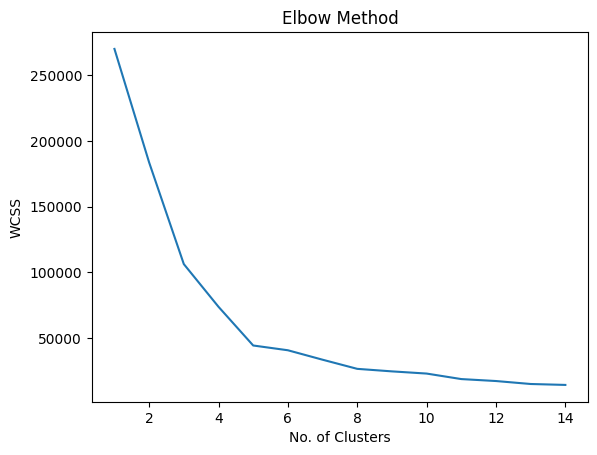

In [5]:
plt.plot(range(1, 15), wcss)

plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
n_clusters = 5 # optimal clusters

##### train the model

In [7]:
# k-means++ prevents random initialization trap
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)

In [8]:
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


##### visualize the clusters

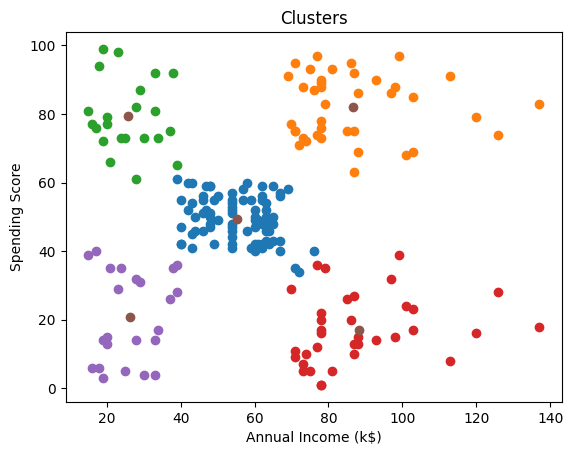

In [9]:
for c in range(0, n_clusters):
    plt.scatter(x[y == c, 0], x[y == c, 1])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()